In [18]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set_style("whitegrid")


In [87]:
K = list(range(25))

In [38]:
hit_ratios = []
for k in tqdm(K):
    fname = f"./logs/swin/cache/val/full/24nCr{k}{'-10k' if (k>4 and k<20) else ''}/all.pth"
    data = torch.load(fname)
    preds = data["preds"]
    targets = data["targets"]
    TP = preds == targets
    hit_ratio = TP.sum(dim=0) / TP.shape[0]
    hit_ratios.append(hit_ratio)

  0%|          | 0/25 [00:00<?, ?it/s]

In [39]:
torch.save(hit_ratios, "notebook-cache/swin/val_hit_ratios.pth")

In [30]:
colors = plt.cm.jet(torch.linspace(0,1,len(K)).numpy())

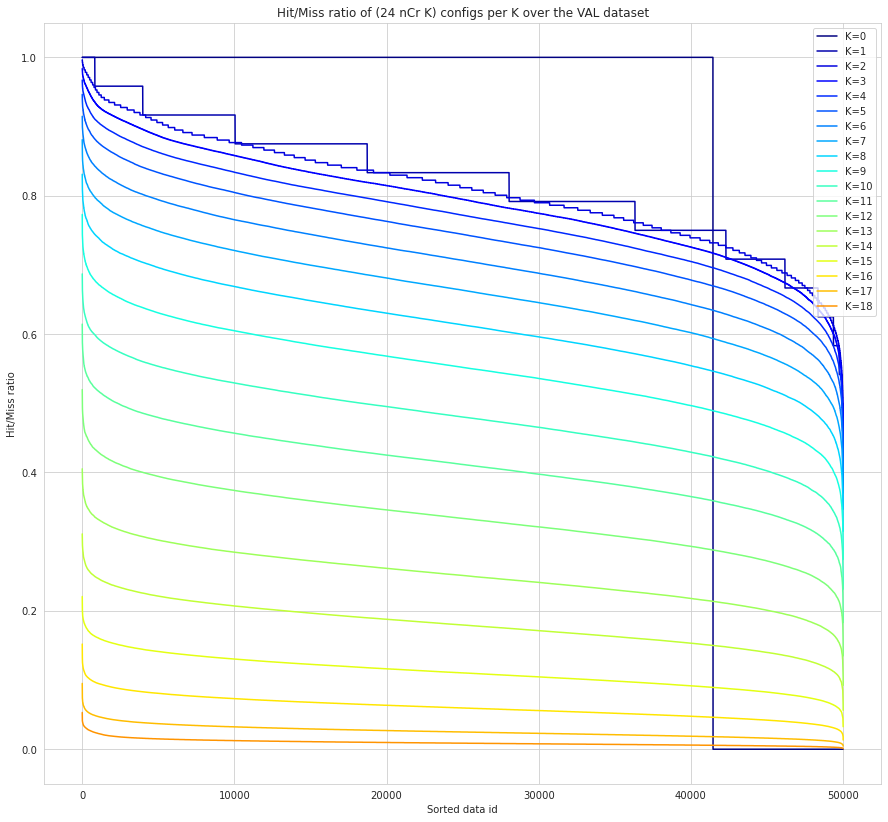

In [52]:
select_K = range(0, 19)
plt.figure(figsize=[15, 14])
plt.title("Hit/Miss ratio of (24 nCr K) configs per K over the VAL dataset")
for k in select_K:
    hit_ratio = hit_ratios[k]
    plt.plot(hit_ratio.sort(descending=True).values, color=colors[k], label=f"K={k}")
    
plt.xlabel("Sorted data id")
plt.ylabel("Hit/Miss ratio")
plt.legend()

In [74]:
len(hit_ratios)

25

In [117]:
def RatioBreakpoints(ratio):
    hit_ratios_sorted = [hit_ratios[k].sort(descending=True).values for k in K]
    idx = 0
    breakpoints = [0,]
    break_K = []
    k = max(select_K)
    while idx < len(hit_ratios[k]) and k > min(select_K):
        if ratio < hit_ratios_sorted[k][idx]:
            idx += 1
        else:
            breakpoints.append(idx)
            break_K.append(k)
            k -= 1

    return breakpoints, break_K
        
    

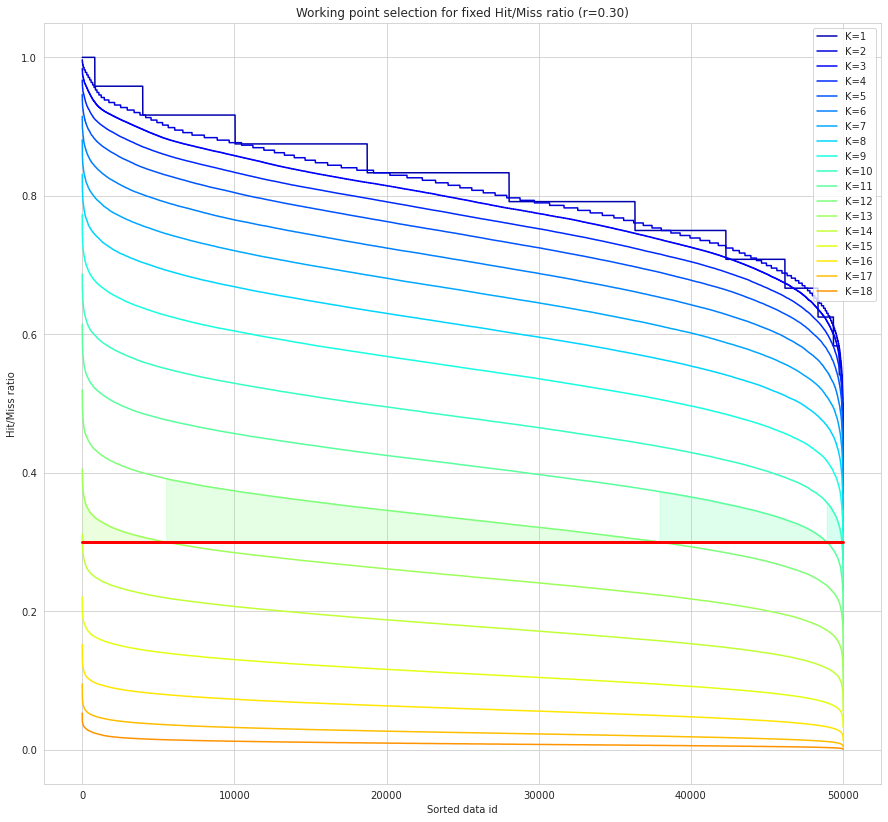

In [121]:
select_K = range(1, 19)
plt.figure(figsize=[15, 14])

ratio = 0.3
plt.title(f"Working point selection for fixed Hit/Miss ratio (r={ratio:0.2f})")
for k in select_K:
    hit_ratio = hit_ratios[k]
    plt.plot(hit_ratio.sort(descending=True).values, color=colors[k], label=f"K={k}")

breakpoints, break_K = RatioBreakpoints(ratio)
for i in range(len(breakpoints)-1):
    idx_from = breakpoints[i]
    idx_to = breakpoints[i+1]
    
    plt.fill_between(
        torch.arange(idx_from, idx_to), 
        torch.ones(idx_to-idx_from)*ratio, 
        hit_ratios_sorted[break_K[i]][idx_from:idx_to],
        color=colors[break_K[i]],
        alpha=0.2
    )

plt.plot([0, len(hit_ratios[0])], [ratio, ratio], color="red", lw=3)

    
plt.xlabel("Sorted data id")
plt.ylabel("Hit/Miss ratio")
plt.legend()

In [124]:
select_K = range(1, 19)

for ratio in tqdm(torch.linspace(1.0, 0.0, 100)):

    plt.figure(figsize=[15, 14])
    plt.title(f"Working point selection for fixed Hit/Miss ratio (r={ratio:0.2f})")
    for k in select_K:
        hit_ratio = hit_ratios[k]
        plt.plot(hit_ratio.sort(descending=True).values, color=colors[k], label=f"K={k}")

    breakpoints, break_K = RatioBreakpoints(ratio)
    for i in range(len(breakpoints)-1):
        idx_from = breakpoints[i]
        idx_to = breakpoints[i+1]

        plt.fill_between(
            torch.arange(idx_from, idx_to), 
            torch.ones(idx_to-idx_from)*ratio, 
            hit_ratios_sorted[break_K[i]][idx_from:idx_to],
            color=colors[break_K[i]],
            alpha=0.2
        )

    plt.plot([0, len(hit_ratios[0])], [ratio, ratio], color="red", lw=3)


    plt.xlabel("Sorted data id")
    plt.ylabel("Hit/Miss ratio")
    plt.legend()
    plt.savefig(f"notebook-cache/swin/wps-r{ratio:0.2f}.png")
    plt.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
select_K = range(1, 19)
plt.figure(figsize=[15, 14])
plt.title("Hit/Miss ratio of (24 nCr K) configs per K over the VAL dataset")
k = 0
hit_ratio = hit_ratios[k]
hit_ratio_sorted = hit_ratio.sort(descending=True).values
plt.plot(hit_ratio_sorted, color=colors[k], label=f"K={k}")
plt.fill_between(torch.arange(len(hit_ratio)), torch.zeros_like(hit_ratio), hit_ratio_sorted, color=colors[k], alpha=0.2)

box_text = f"AuC={hit_ratio.mean():0.2f}"

plt.text(10000, 0.05, box_text, size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(0.1, 0.5, 0.5),
                   fc=(1., 1., 1.),
                   )
         )

plt.xlabel("Sorted data id")
plt.ylabel("Hit/Miss ratio")
plt.legend()

In [60]:
AuCs

[tensor(0.8289),
 tensor(0.8198),
 tensor(0.8070),
 tensor(0.7900),
 tensor(0.7677),
 tensor(0.7402),
 tensor(0.7031),
 tensor(0.6604),
 tensor(0.6108),
 tensor(0.5501),
 tensor(0.4789),
 tensor(0.4107),
 tensor(0.3335),
 tensor(0.2514),
 tensor(0.1802),
 tensor(0.1113),
 tensor(0.0607),
 tensor(0.0259),
 tensor(0.0096),
 tensor(0.0040),
 tensor(0.0021),
 tensor(0.0016),
 tensor(0.0013),
 tensor(0.0012),
 tensor(0.0011)]

Text(0, 0.5, 'Area Under the Curve in the Hit/Miss ratio plot')

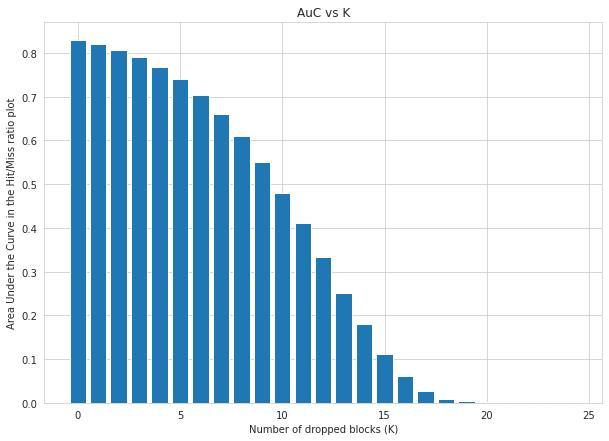

In [66]:
select_K = range(1, 19)
plt.figure(figsize=[10, 7])
# plt.title("Hit/Miss ratio of (24 nCr K) configs per K over the VAL dataset")
AuCs = []
for k in K:
    hit_ratio = hit_ratios[k]
    hit_ratio_sorted = hit_ratio.sort(descending=True).values
    # plt.plot(hit_ratio_sorted, color=colors[k], label=f"K={k}")
    # plt.fill_between(torch.arange(len(hit_ratio)), torch.zeros_like(hit_ratio), hit_ratio_sorted, color=colors[k], alpha=0.2)
    AuCs.append(hit_ratio.mean())

    # plt.text(10000, 0.05, box_text, size=20,
    #          ha="center", va="center",
    #          bbox=dict(boxstyle="round",
    #                    ec=(0.1, 0.5, 0.5),
    #                    fc=(1., 1., 1.),
    #                    )
    #          )

    # plt.xlabel("Sorted data id")
    # plt.ylabel("Hit/Miss ratio")
    # plt.legend()
plt.title("AuC vs K")
plt.bar(K, AuCs)
plt.xlabel("Number of dropped blocks (K)")
plt.ylabel("Area Under the Curve in the Hit/Miss ratio plot")
# plt.plot(AuCs)